# imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys  
sys.path.insert(0, '/home/tofi/Documents/code/tofi_ml/Linear models/Logistic regression')
from LinearRegression import LinearRegression as lr

# reading data

In [2]:
data = pd.read_csv("data/ds1_train.csv")

In [3]:
x_train = data[["x_1", "x_2"]]
x_train = np.array(x_train)

In [4]:
y_train = np.array(data.y)

In [5]:
eval_data = pd.read_csv("data/ds1_valid.csv")
x_eval = np.array(eval_data[["x_1", "x_2"]])
y_eval = np.array(eval_data.y)

# visualizing data

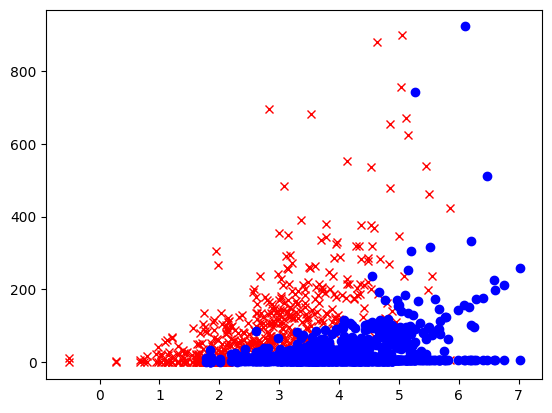

In [6]:
# seperate classes into two arrays
class0_x = x_train[y_train== 0]
class1_x = x_train[y_train== 1]

# plot both classes
plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

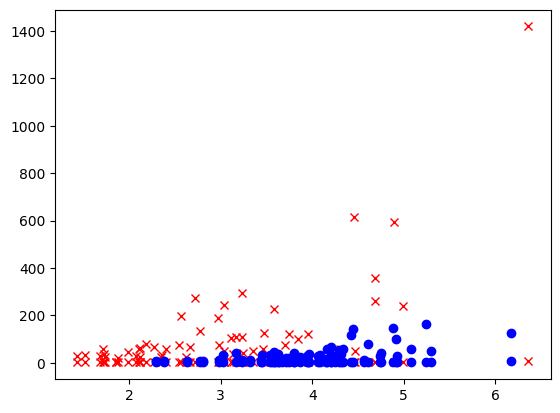

In [7]:
class0_x = x_eval[y_eval == 0]
class1_x = x_eval[y_eval == 1]

plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

# training model

In [8]:
model = lr()

In [9]:
# train model with doffrent lr and iter_limit to find best fit
model.train(x_train, y_train, lr=0.001, iter_limit=100000)

In [10]:
model.weights

array([ 1.5563827, -0.0248754])

In [11]:
model.bias

-3.3689225613669187

In [12]:
# predict on eval data
pred = model.predict(x_eval)

# calculate accuracy
result = (pred == y_eval)
result.sum() / pred.size

0.88

# Visualizing model preformance

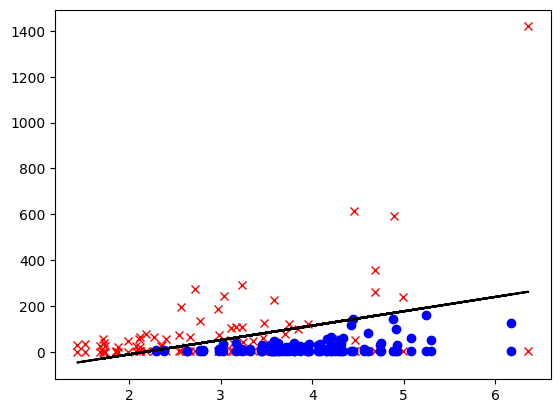

In [13]:
# plot eval data
class0_x = x_eval[y_eval == 0]
class1_x = x_eval[y_eval == 1]
plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

# plot decision boundary
dec_boundary = -(model.bias + model.weights[0]*x_eval[:,0]) / model.weights[1]
plt.plot(x_eval[:,0], dec_boundary, "black")

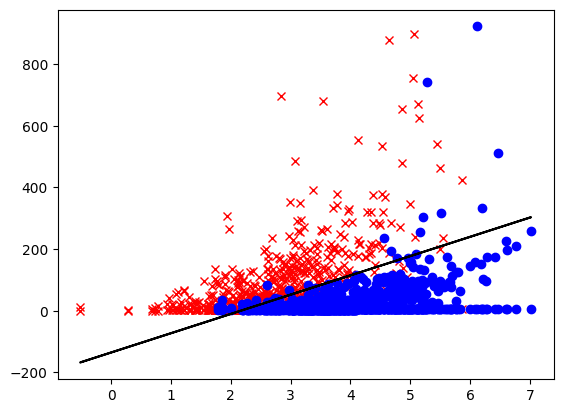

In [14]:
# plot train data
class0_x = x_train[y_train == 0]
class1_x = x_train[y_train == 1]
plt.plot(class0_x[:, :1], class0_x[:, :2], "rx")
plt.plot(class1_x[:, :1], class1_x[:, :2], "bo")

# plot decision boundary
dec_boundary = -(model.bias + model.weights[0]*x_train[:,0]) / model.weights[1]
plt.plot(x_train[:,0], dec_boundary, "black")